fro tutorial_multipass.ipynb

In [1]:
# %load red_Cell.py
from openpiv import tools, pyprocess, scaling, filters, \
                    validation

import numpy as np
import matplotlib.pyplot as plt

import imageio
from pylab import *
%matplotlib inline

from skimage import img_as_uint

In [2]:
frame_a  = tools.imread('../vortexpair/vp1a.tif')  
frame_b  = tools.imread('../vortexpair/vp1b.tif')

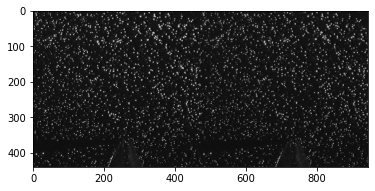

In [3]:
plt.imshow(np.c_[frame_a[40:,:-40],frame_b[40:,:-40]],cmap=plt.cm.gray)

In [4]:
frame_a = frame_a[40:, :-40].astype(np.int32) # change of type for the Cython WiDIM
frame_b = frame_b[40:, :-40].astype(np.int32)

In [5]:
# Use Python version, pyprocess:

u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a, frame_b, 
                                                     window_size=32, 
                                                     overlap=16,
                                                     search_area_size=32,
                                                     dt=.1, 
                                                     sig2noise_method='peak2peak',
                                                    normalized_correlation=True,
                                                    correlation_method = 'circular')
x, y = pyprocess.get_coordinates(image_size=frame_a.shape, 
                                 search_area_size=32, 
                                 overlap=16)

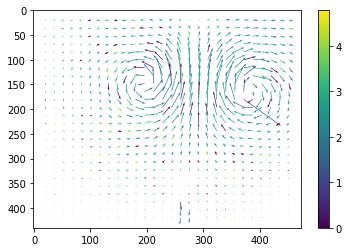

In [6]:
plt.quiver(x,y,u,-v,sig2noise)
plt.gca().invert_yaxis()
plt.colorbar()

In [12]:
u1, v1, mask = validation.sig2noise_val( u, v, 
                                        sig2noise, 
                                        threshold = 1.05 )

In [13]:
tools.save(x, y, u1, v1, mask, 'vortex.txt' )

In [ ]:
import h5rdmtoolbox as h5tbx

In [ ]:
from openpiv import windef
openpiv_par = h5tbx.x2hdf.piv.openpiv.OpenPIVParameterFile.from_windef(windef.Settings())

In [ ]:
openpiv_par.save('openpiv.par')